In [8]:
import numpy as np; np.random.seed(1)
import pandas as pd
import json
import matplotlib.pyplot as plt


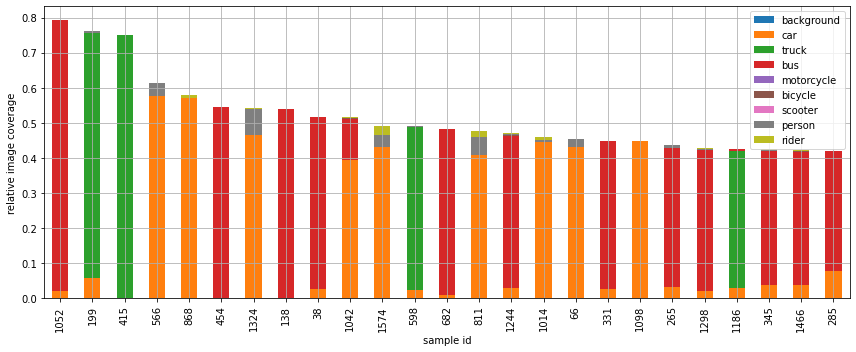

In [67]:
df = pd.read_json('bb_sizes.json')
df = df.sort_values('sum', ascending=False).drop(['sum'], axis=1)
ax = df[:25].plot(figsize=(12,5), kind='bar', stacked=True, grid=True)
ax.set_xlabel("sample id")
ax.set_ylabel("relative image coverage")
ax.legend(loc="upper right", ncol=1)
plt.tight_layout()
plt.savefig("top_25_bb_sizes.pdf")

[('7/8', 1), ('13/12', 1), ('13/10', 1), ('8/9', 1), ('14/11', 1), ('11/12', 1), ('11/13', 1), ('8/7', 1), ('9/7', 1), ('12/13', 1), ('2/3', 1), ('7/9', 2), ('11/8', 2), ('9/8', 2), ('10/7', 2), ('13/14', 2), ('1/1', 2), ('7/6', 2), ('13/8', 3), ('8/5', 3), ('5/4', 3), ('4/3', 3), ('11/7', 3), ('7/4', 4), ('11/6', 4), ('14/13', 4), ('7/5', 4), ('3/2', 5), ('11/9', 5), ('12/7', 6), ('14/9', 6), ('5/3', 7), ('13/9', 7), ('11/5', 8), ('9/5', 10), ('9/4', 10), ('13/5', 13), ('11/4', 15), ('13/7', 15), ('8/3', 17), ('7/3', 19), ('12/5', 20), ('2/1', 20), ('5/2', 23), ('13/6', 24), ('10/3', 32), ('14/5', 34), ('3/1', 55), ('13/4', 58), ('7/2', 61), ('9/2', 76), ('11/3', 76), ('13/3', 98), ('4/1', 129), ('14/3', 159), ('5/1', 261), ('13/1', 291), ('12/1', 439), ('6/1', 469), ('13/2', 499), ('11/2', 509), ('7/1', 624), ('9/1', 655), ('10/1', 701), ('8/1', 715), ('11/1', 779), ('14/1', 6499)]


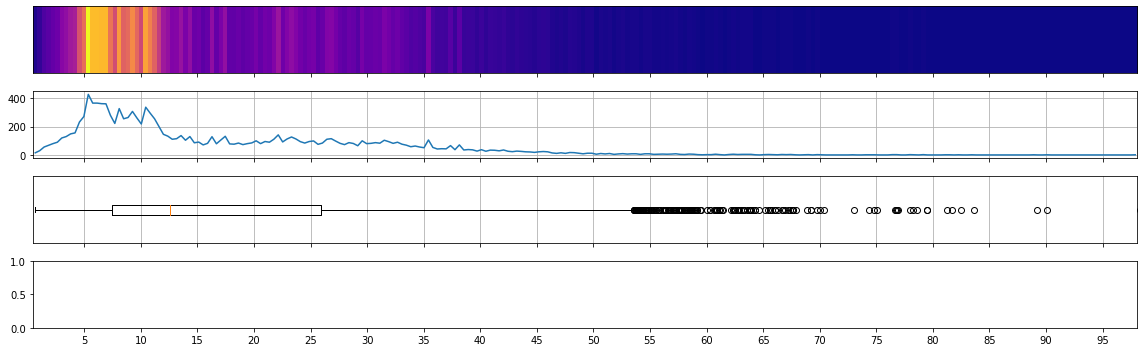

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

common_aspect_ratios = []

for height in range(1,15):
    for width in range(1,15):
        ratio = height / width
        common_aspect_ratios.append((height/width, f"{height}/{width}"))

common_aspect_ratios.sort(key=lambda x: x[0])

def getClosestCommonAspectRatio(ar):
    return min(common_aspect_ratios, key=lambda x:abs(x[0]-ar))[1]

aspect_ratios = []
with open('aspect_ratios.json') as f:
    aspect_ratios = json.load(f)
    

closestCommonAspectRatios = {}
for aspect_ratio in aspect_ratios:
    closestCommonAspectRatios.setdefault(
        getClosestCommonAspectRatio(aspect_ratio),
        list()
    ).append(aspect_ratio)

closestCommonAspectRatios = [(k, len(v)) for k, v in closestCommonAspectRatios.items()]
closestCommonAspectRatios.sort(key=lambda x: x[1])
print(closestCommonAspectRatios)

y, x = np.histogram(aspect_ratios, bins=250)
x = x[:-1]

#x = np.linspace(-3,3)
#y = np.cumsum(np.random.randn(50))+6

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(16, 5))
ax1.xaxis.set_major_locator(MultipleLocator(5))


extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax1.set_yticks([])
ax1.set_xlim(extent[0], extent[1])
ax1.xaxis.set_major_locator(MultipleLocator(5))

ax2.grid()
ax2.plot(x,y)

ax3.grid()
ax3.boxplot(aspect_ratios, vert=False)
ax3.set_yticks([])

#ax4.bar(*zip(*closestCommonAspectRatios))

plt.tight_layout()
plt.savefig('aspect_ratios.pdf')
plt.show()


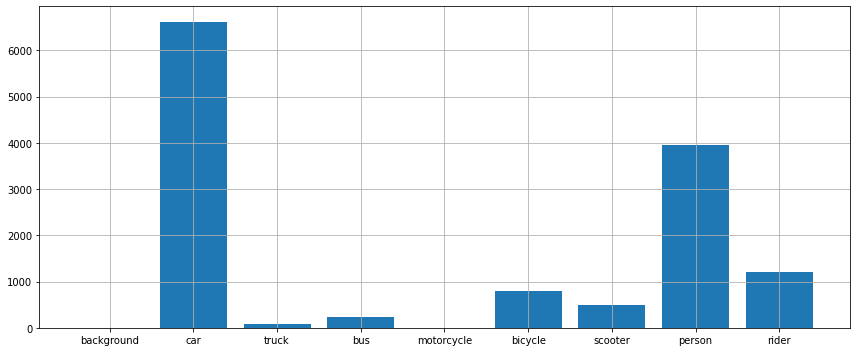

In [68]:
with open('total_class_occurrences.json') as f:
    data = json.load(f)
    
plt.figure(figsize=(12,5))
plt.bar(*zip(*data.items()))
plt.grid()
plt.tight_layout()
plt.savefig('total_class_occurrences.pdf')
plt.show()